In [15]:
import cv2  # Importa la biblioteca OpenCV para procesamiento de imágenes
from google.colab import files  # Importa la función files de la biblioteca google.colab para cargar archivos
from IPython.display import Image, display  # Importa las clases Image y display de IPython.display para mostrar imágenes

In [16]:
uploaded = files.upload()  # Carga un archivo desde el entorno local (Google Colab)

Saving CARAS IMAGEN.png to CARAS IMAGEN (1).png


In [17]:
image_path = list(uploaded.keys())[0]  # Obtiene la ruta del archivo cargado
image = cv2.imread(image_path)  # Lee la imagen desde la ruta especificada usando OpenCV
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convierte la imagen a escala de grises

In [18]:
# Descarga el archivo XML del clasificador Haar Cascade para detección de rostros desde GitHub
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2024-07-24 17:40:51--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2024-07-24 17:40:51 (15.9 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



In [19]:
# Carga el clasificador Haar Cascade para detección de rostros
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


In [20]:
# Detecta las caras en la imagen en escala de grises usando el clasificador Haar Cascade
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [21]:
# Dibuja rectángulos alrededor de las caras detectadas en la imagen original
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

Se detectaron 15 cara(s) en la imagen.


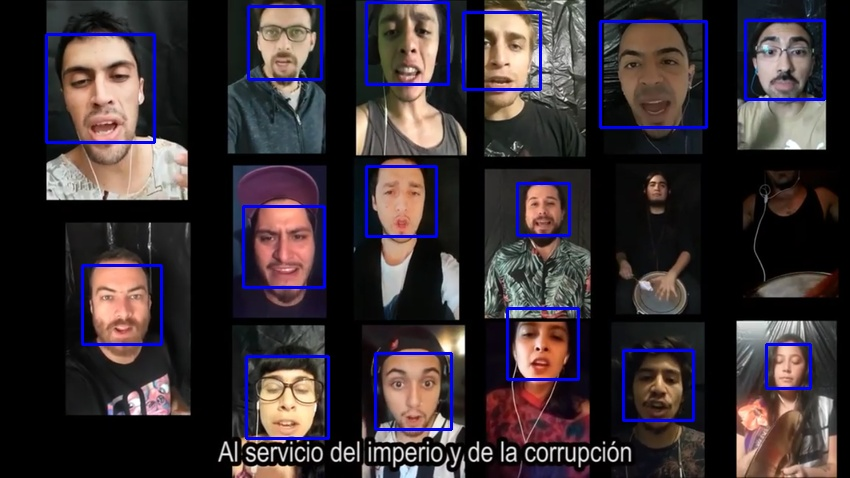

In [22]:
# Contar el número de caras detectadas
num_faces = len(faces)
print(f'Se detectaron {num_faces} cara(s) en la imagen.')

# Guarda la imagen con los rectángulos dibujados
cv2.imwrite('faces_detected.jpg', image)

# Muestra la imagen con los rectángulos dibujados en el entorno de IPython
display(Image('faces_detected.jpg'))

En este ejemplo, primero cargamos una imagen desde nuestro sistema local a Google Colab. Luego, convertimos la imagen a escala de grises y utilizamos el modelo Haar Cascade *para* detectar rostros en la imagen. Finalmente, dibujamos rectángulos alrededor de los rostros detectados y mostramos la imagen resultante con los rostros destacados.

Recuerda que este ejemplo utiliza un modelo Haar Cascade preentrenado, que es una técnica básica para la detección de rostros.